In [3]:
DFIRE_DATA_PATH = "D-Fire"
PLACES_DATA_PATH = "data_256"
FIRE_DATA_PATH = "fire_dataset"
FIRE_VIDEOS_DATA_PATH = "fire_videos.1406"

In [4]:
from typing import Tuple, List
import torch
import torchvision.io
import os
#define type alias for tuple of (x,y) list of tensors for train and test
Labels = List[bool]

ImageData = Tuple[List[torch.Tensor], Labels]
VideoData = List[torch.Tensor]



def get_video_data() -> Tuple[torch.Tensor, torch.Tensor]:
    """
    reads videos from directory and returns a tensor"
    First list of tensors is videos without fire
    Second list of tensors is videos with fire
    """
    pos_videos = []

    for pos_video in os.listdir(os.path.join(FIRE_VIDEOS_DATA_PATH, "pos")):
        pos_video_path = os.path.join(FIRE_VIDEOS_DATA_PATH, "pos", pos_video)
        frames, _, _ = torchvision.io.read_video(pos_video_path)  # frames: [T, H, W, C]
        pos_videos.append(frames)  # Append the frames tensor to the list

    neg_videos = []
    for neg_video in os.listdir(os.path.join(FIRE_VIDEOS_DATA_PATH, "neg")):
        neg_video_path = os.path.join(FIRE_VIDEOS_DATA_PATH, "neg", neg_video)
        frames, _, _ = torchvision.io.read_video(neg_video_path)  # frames: [T, H, W, C]
        neg_videos.append(frames)  # Append the frames tensor to the list

    return pos_videos, neg_videos


fire_videos, nofire_videos = get_video_data()

torch.Size([178, 256, 400, 3])


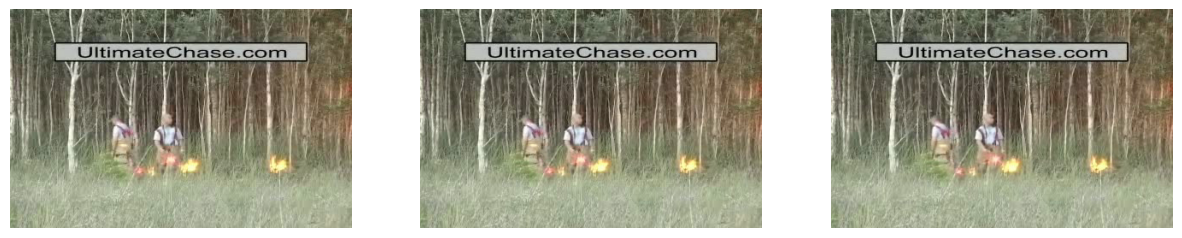

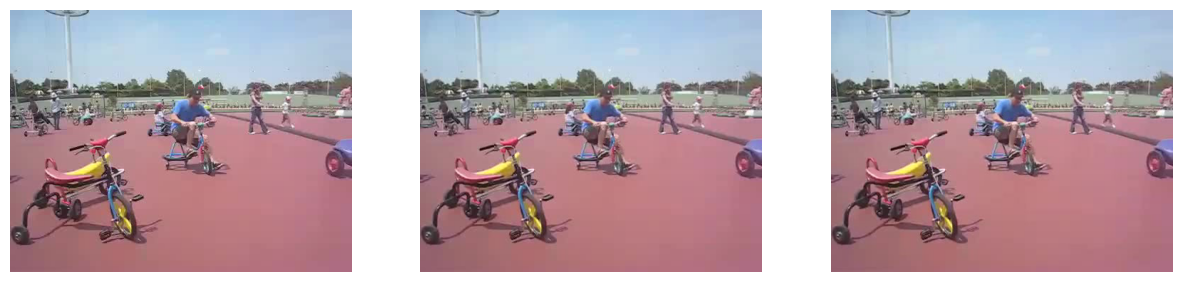

In [22]:
print(fire_videos[0].shape)  # Print the shape of the first video tensor

# display first 5 frames of first video
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import numpy as np
def display_video(video_tensor: torch.Tensor, num_frames: int = 5):
    """
    Display the first num_frames of a video tensor
    each video tensotr should be (T, H, W, C) shape
    """
    num_frames = min(num_frames, video_tensor.shape[0])
    fig, axes = plt.subplots(1, num_frames, figsize=(15, 5))
    for i in range(num_frames):
        frame = video_tensor[i] #
        axes[i].imshow(frame)
        axes[i].axis('off')
    plt.show()
# Display the first 5 frames of the first video
display_video(fire_videos[0], num_frames=3)
# Display the first 5 frames of the first nofire video
display_video(nofire_videos[0], num_frames=3)


In [5]:
def get_image_data(n_total_samples = 1000) -> Tuple[Data, Data, Data]:
    """
    Generate random data for training and testing.
    """



NameError: name 'Data' is not defined